### **Import librarys**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

### **Import Data**

In [5]:
dataset = pd.read_csv("../input/handwritten-az/handwritten_data_785.csv").astype('float32')

In [8]:
dataset.shape

(372037, 785)

In [11]:
dataset['0']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372032    25.0
372033    25.0
372034    25.0
372035    25.0
372036    25.0
Name: 0, Length: 372037, dtype: float32

In [12]:
dataset.rename(columns={'0':'label'}, inplace=True)
dataset['label']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372032    25.0
372033    25.0
372034    25.0
372035    25.0
372036    25.0
Name: label, Length: 372037, dtype: float32

In [13]:
# Split data
X = dataset.drop('label',axis = 1)
y = dataset['label']
X.shape, y.shape

((372037, 784), (372037,))

### **Explore data**

In [14]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))
print("784 = 28X28")

X.head()

shape: (372037, 784)
culoms count: 784
784 = 28X28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X = np.array(X)
print(X[1])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.
 182. 254.  97.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  85.
 247. 255. 202.  15.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  55. 210.
 247. 244. 238.  78.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

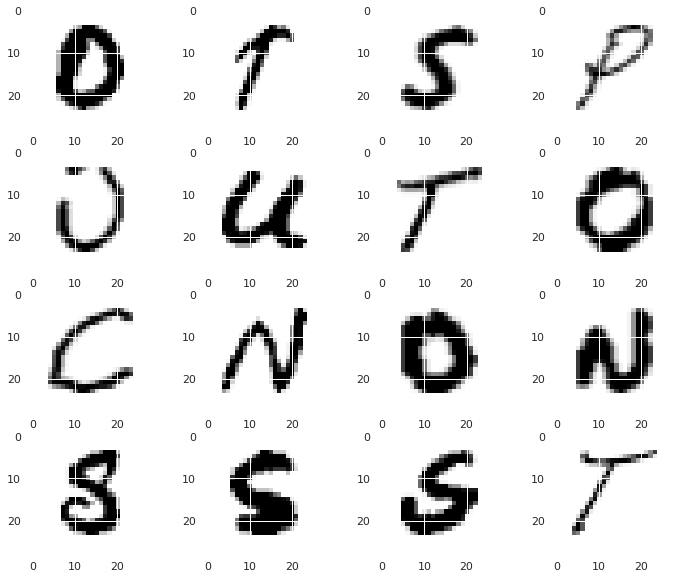

In [25]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28), interpolation='nearest', cmap='Greys')
plt.show()

Amount of each labels


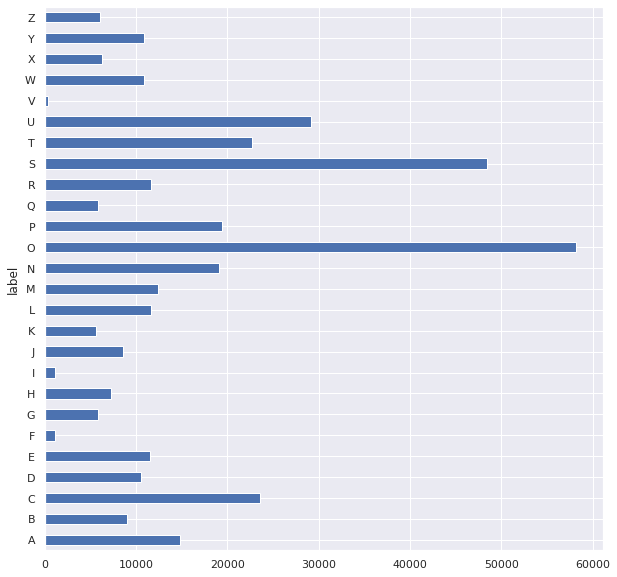

We have very low observations for I and F 
I count: 1118
F count: 1164


In [26]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations for I and F ")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

### **Data Preparation**

In [33]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()  # x_scaled = (x - x_min) / (x_max - x_min)
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((279027, 784), (279027,), (93010, 784), (93010,))

In [36]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((279027, 28, 28, 1), (279027, 26), (93010, 28, 28, 1), (93010, 26))

### **Build the CNN model**

In [37]:
# Convolutional Neural Network 
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
__________________________________________________


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [38]:
cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
1396/1396 - 42s - loss: 0.2466 - accuracy: 0.9331 - val_loss: 0.1086 - val_accuracy: 0.9713
Epoch 2/18
1396/1396 - 41s - loss: 0.1033 - accuracy: 0.9721 - val_loss: 0.0873 - val_accuracy: 0.9763
Epoch 3/18
1396/1396 - 40s - loss: 0.0817 - accuracy: 0.9778 - val_loss: 0.0738 - val_accuracy: 0.9797
Epoch 4/18
1396/1396 - 41s - loss: 0.0680 - accuracy: 0.9812 - val_loss: 0.0676 - val_accuracy: 0.9814
Epoch 5/18
1396/1396 - 40s - loss: 0.0576 - accuracy: 0.9840 - val_loss: 0.0608 - val_accuracy: 0.9841
Epoch 6/18
1396/1396 - 41s - loss: 0.0501 - accuracy: 0.9856 - val_loss: 0.0571 - val_accuracy: 0.9846
Epoch 7/18
1396/1396 - 42s - loss: 0.0435 - accuracy: 0.9873 - val_loss: 0.0551 - val_accuracy: 0.9854
Epoch 8/18
1396/1396 - 40s - loss: 0.0386 - accuracy: 0.9884 - val_loss: 0.0486 - val_accuracy: 0.9873
Epoch 9/18
1396/1396 - 41s - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0470 - val_accuracy: 0.9879
Epoch 10/18
1396/1396 - 41s - loss: 0.0307 - accuracy: 0.9903 - val_loss:

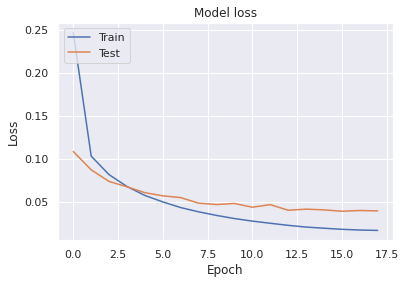

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<AxesSubplot:>

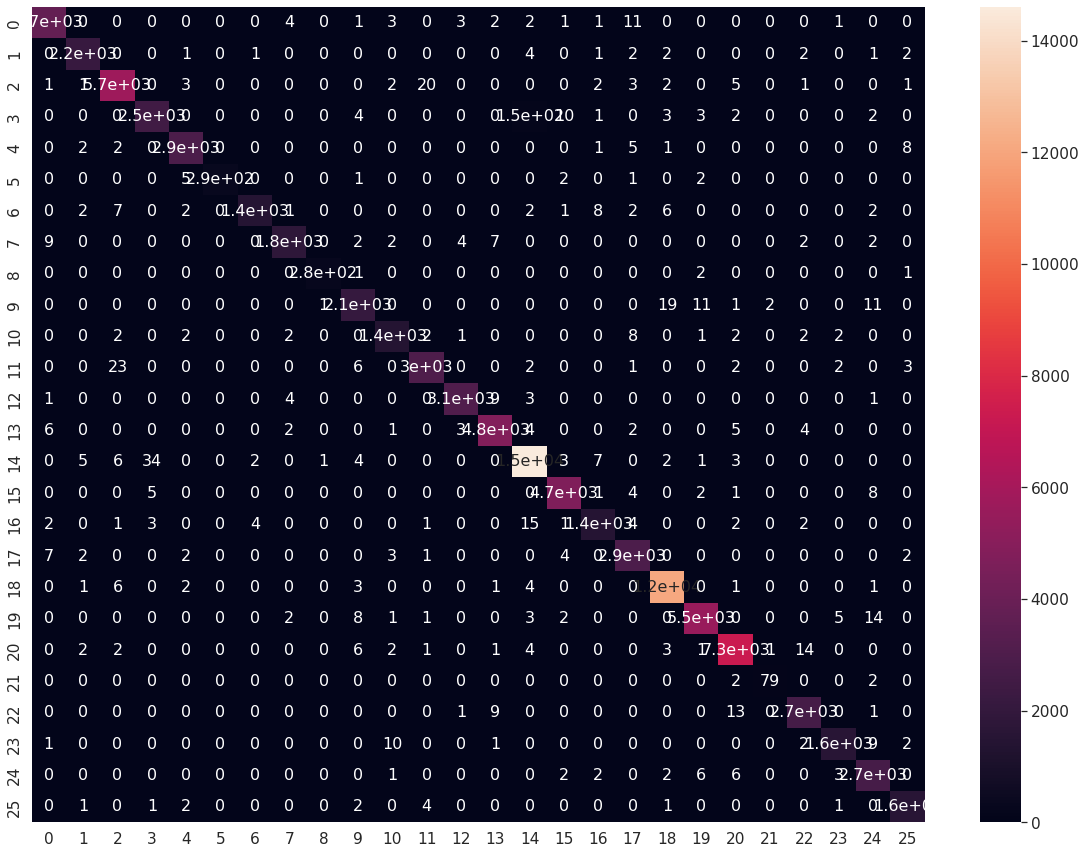

In [40]:
cm=confusion_matrix(y_test.argmax(axis=1),cls.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

### **Evaluate the model by random testing**

Random Test Images: 


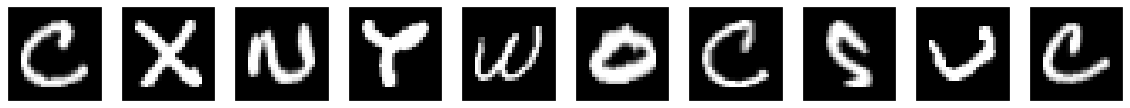

Predicted classes: C X N Y W O C S U C 

In [41]:
# Random testing
output_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

import matplotlib.pyplot as plt
%matplotlib inline

# utility function for showing images
def show_imgs(x_test, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

print('Random Test Images: ')
prediction = cls.predict(X_test[10:20])
show_imgs(X_test[10:20])
classes_x=np.argmax(prediction,axis=1)
print('Predicted classes: ',end="")
for p in classes_x:
    print(output_labels[p],end=" ")

### **Save model for my app**

In [ ]:
cls.save('CNN_model.h5')